# Travail personnel 1 : Pendule double et Runge Kutta
## Safae Ben Ayad & Maxime Langlet
## 13 Novembre 2018


Dans ce travail, nous nous intéressons au problème du pendule double.
Il s'agit d'un premier pendule à l'extrémité duquel on accroche un deuxième pendule. Chacun des deux pendules est constitué lui-même d'un barreau de longueur $l$ et de masse $m$, le tout constitu donc le pendule double. 

On cherche à résoudre les équations du mouvement du pendule simple, pour ce faire nous allons tout d'abord décrire ce système grâce au formalisme lagrangien.

$\underline{Remarque}$: Nous allons prendre nos axes de manière à que y croise vers le haut et x croise vers la droite.

Par définition du Langragien $L$ vaut: $$L = K - V $$ 

où $K = \frac{1}{2}m(v^2)_1 + \frac{1}{2}m(v^2)_2$ l'énergie cinétique du pendule
et $V = mg(y_1 + y_2)$ l'énergie potentiel du pendule. 


In [1]:
import numpy as np
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
x1 = l/2*np.sin(a1) 
y1 = -l/2*np.cos(a1)


x2 = l*(np.sin(a1)+l/2*np.sin(a2))
y2 = -l*(np.cos(a1)+l/2*np.cos(a2))


b1=6/(m*l**2)*(2*pa1-3*np.cos(a1-a2)*pa2)/(16-9*np.cos(a1-a2)**2)
b2=6/(m*l**2)*(8*pa2-3*np.cos(a1-a2)*pa1)/(16-9*np.cos(a1-a2)**2)


pa1 = 1/6*m*l**2(8*b1+3*b2*np.cos(a1-a2))
pa2 = 1/6*m*l**2(2*b2+3*b1*np.cos(a1-a2))




L = 1/6*m*l**2*(b2**2+4*b1**2+3*b1*b2*np.cos(a1-a2))-1/2*m*g*l*(3*np.cos(a1)+np.cos(a2))


qa1 = -1/2*m*l**2*(b1*b2*np.sin(a1-a2)+3*g/l*np.sin(a1))
qa2 = -1/2*m*l**2*(-b1*b2*np.sin(a1-a2)+g/l*np.sin(a2))

NameError: name 'l' is not defined

In [3]:
#Données/Conditions initiales
l=1     #longueur
m=1     #masse
g=9.81
a10=math.pi/2   #theta1 val initiale
a20=math.pi/2   #theta2 val initiale
pa10=0          #impulsion1 val initiale
pa20=0          #impulsion2 val initiale
t0=0
T = 20.0  # length of the time interval
dt = 0.001  # time-step size
N = int(T / dt) + 1  # number of time steps
u0 = np.array([a10,a20,pa10,pa20])


#On def f comme la fonction f(u)=u'
#u etant la liste nos variables
#u' la liste des derivées (stockées dans results) 

def f(u):
    a1=u[0]
    a2=u[1]
    pa1=u[2]
    pa2=u[3]   
    b1=6/(m*l**2)*(2*pa1-3*np.cos(a1-a2)*pa2)/(16-9*np.cos(a1-a2)**2)   #derivée de théta1
    b2=6/(m*l**2)*(8*pa2-3*np.cos(a1-a2)*pa1)/(16-9*np.cos(a1-a2)**2)   #derivée de théta2
    qa1 = -1/2*m*l**2*(b1*b2*np.sin(a1-a2)+3*g/l*np.sin(a1))            #dérivée de l'imp 1
    qa2 = -1/2*m*l**2*(-b1*b2*np.sin(a1-a2)+g/l*np.sin(a2))             #dérivée de l'imp 2
    result = np.array([b1,b2,qa1,qa2])                  #liste des derivées de nos variables
    return result


def RK4(f,u0,dt,T,t0):
    N = int(T / dt) + 1 
    
    tv = np.zeros(N)      # liste de 0's pour stocker les valeurs des dt(intervalles de temps)
    uv = np.zeros((N,4))    # matrice Nx4 de 0's pour stocker les solutions 
                          # en chaque ligne les differentes 4 variable pour un time-step 
                          # 4 variables (une par colonne) theta1, theta2, impul1, impul2
            
    tv[0]=t0              
    uv[0]=u0
    for i in range(1,N):
        k1=dt*f(uv[i-1])
        k2=dt*f(uv[i-1]+k1/2)
        k3=dt*f(uv[i-1]+k2/2)
        k4=dt*f(uv[i-1]+k3)
        
        #on crée liste us de 4élem avec les valeurs de uv qui change pour chaque dt (par R-K)
        us = uv[i-1] + 1/6*(k1+2*k2+2*k3+k4) 
        
        tv[i] = tv[i-1]+dt      #on stocke dans tv
        uv[i] = us              #on rempli uv avec la liste us
    return(tv,uv)

In [7]:
"Convertions en coordonées cartésiennes"
solutions = RK4(f,u0,0.001,20,0)
#tvs = solutions[0]             
uvs = solutions[1]

x1 = np.zeros(N)      #nouvelles listes de 0's taille N
y1 = np.zeros(N)
x2 = np.zeros(N)
y2 = np.zeros(N)

for i in range(N):
    x1[i] = l*np.sin(uvs[i][0])
    y1[i] = -l*np.cos(uvs[i][0])
    x2[i] = l*(np.sin(uvs[i][0]) + np.sin( uvs[i][1] ))
    y2[i] = -l*(np.cos( uvs[i][0] ) + np.cos( uvs[i][1] ))
print( x1[N-1], y1[N-1], x2[N-1], y2[N-1])
print(N)

(array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 1.9998e+01, 1.9999e+01,
       2.0000e+01]), array([[ 1.57079633e+00,  1.57079633e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.57079002e+00,  1.57079843e+00, -1.47150000e-02,
        -4.90500000e-03],
       [ 1.57077110e+00,  1.57080474e+00, -2.94300000e-02,
        -9.81000000e-03],
       ...,
       [ 7.21180420e-01, -2.13368531e+01,  4.03948953e+00,
        -2.06383822e+00],
       [ 7.22796624e-01, -2.13406214e+01,  4.02955300e+00,
        -2.06064867e+00],
       [ 7.24404456e-01, -2.13443936e+01,  4.01958328e+00,
        -2.05745844e+00]]))
[[ 1.57079633e+00  1.57079633e+00  0.00000000e+00  0.00000000e+00]
 [ 1.57079002e+00  1.57079843e+00 -1.47150000e-02 -4.90500000e-03]
 [ 1.57077110e+00  1.57080474e+00 -2.94300000e-02 -9.81000000e-03]
 ...
 [ 7.21180420e-01 -2.13368531e+01  4.03948953e+00 -2.06383822e+00]
 [ 7.22796624e-01 -2.13406214e+01  4.02955300e+00 -2.06064867e+00]
 [ 7.24404456e-01 -2.13443936e+01  4.01958

NameError: name 'animation' is not defined

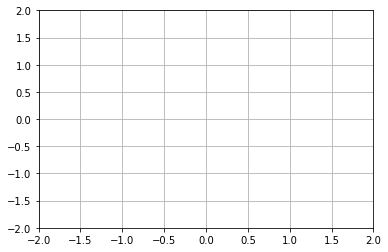

In [5]:
fig = pyplot.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'r-', lw=3)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*h))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, numpy.arange(1, len(y)),interval=0.001, blit=True, init_func=init)

# ani.save('double_pendulum.mp4', fps=15)
pyplot.show()


# Set the font family and size to use for Matplotlib figures.
# pyplot.rcParams['font.family'] = 'serif'
# pyplot.rcParams['font.size'] = 16

# Plot the solution of the elevation.
# pyplot.figure(figsize=(12.0, 7.0))  # set the size of the figure
# pyplot.title('Hauteur en fonction du temps')  # set the title
# pyplot.xlabel('Temps [s]')  # set the x-axis label
# pyplot.ylabel('Hauteur du CM du second barreau [m]')  # set the y-axis label
# pyplot.xlim(t[0], t[-1])  # set the x-axis limits
# pyplot.ylim(-2.0, 2.0)  # set the y-axis limits
# pyplot.grid()  # set a background grid to improve readability
# pyplot.plot(t, y2, color='C0', linestyle='-', linewidth=2);
# pyplot.show()